In [12]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100
from statsmodels.stats.multitest import multipletests


In [13]:
peak_area_filename = "../data/hamster_plasma_all_modes.csv"
experiment_parameters = "../data/hamster_plasma_experiment_parameters.csv"

In [14]:
data = pd.read_csv(peak_area_filename)
data

,Compound Name,Compound Class,Chromatography - ion mode,Compound Name Leg,Formula,Mass,RT,CAS ID,blank-1,blank-2,...,P H-513,P H-514,P H-515,P H-516,QC-P pool-1,QC-P pool-2,QC-P pool-3,QC-P pool-4,QC-P pool-5,QC-P pool-6
0,1_(Z)-3-Hydroxyoctadec-7-enoic acid,covid_id_updated,pHILICneg,pHILICneg_1_(Z)-3-Hydroxyoctadec-7-enoic acid,C18H34O3,298.250795,0.82,NaN,5227,17457,...,772207,122564,282412,579306,410157,375957,380534,342191,354302,389796
1,2_1 5 Anhydro D glucitol,covid_id_updated,pHILICneg,pHILICneg_2_1 5 Anhydro D glucitol,C6H12O5,164.068474,4.56,NaN,2434,1891,...,232718,105401,132976,126072,194553,178096,166137,148775,161153,129277
2,5_14 Z Eicosenoic acid,covid_id_updated,pHILICneg,pHILICneg_5_14 Z Eicosenoic acid,C20H38O2,310.287181,0.77,NaN,2745,3279,...,595896,232450,609587,1116064,610018,571881,561207,571224,556859,570672
3,6_16 Hydroxyhexadecanoic acid,covid_id_updated,pHILICneg,pHILICneg_6_16 Hydroxyhexadecanoic acid,C16H32O3,272.235145,0.84,NaN,15266,4962,...,237691,134103,241330,272484,357661,299087,247931,232537,223569,228274
4,8_2 Aminoadipic acid,covid_id_updated,pHILICneg,pHILICneg_8_2 Aminoadipic acid,C6H11NO4,161.068808,6.62,NaN,724,1097,...,1272,1010,1698,3114,1272,275,2137,709,776,702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,SM d34:2@15.078,Sphingomyelin,HSSneg,HSSneg_SM d34:2@15.078,C39H77N2O6P,700.551925,15.00,NaN,6637,1473,...,6088485,5967489,7305753,6481785,10827467,10396119,8507003,7454636,6364081,5663845
590,SM d36:1@18.052,Sphingomyelin,HSSneg,HSSneg_SM d36:1@18.052,C41H83N2O6P,730.598876,17.97,NaN,8180,8507,...,446365,371813,541213,239936,788688,751911,666222,546870,428824,394352
591,SM d41:2@20.495,Sphingomyelin,HSSneg,HSSneg_SM d41:2@20.495,C46H91N2O6P,798.661476,20.41,NaN,36806,52204,...,364633,636986,1045934,221323,1930169,1656302,1331255,1042535,740336,620862
592,SM d42:2@20.926,Sphingomyelin,HSSneg,HSSneg_SM d42:2@20.926,C47H93N2O6P,812.677126,20.90,NaN,52974,43191,...,892068,1018512,2354259,512908,3953575,3631322,2515256,2265856,1819983,1433997


In [15]:
sample_info = pd.read_csv(experiment_parameters,index_col=0)
sample_info

,Grouping,Group,Day post infection,Group-day
Sample Name,,,,
P H-433,Plasma,Influenza,4,Influenza_d4
P H-457,Plasma,Influenza,4,Influenza_d4
P H-458,Plasma,Influenza,4,Influenza_d4
P H-459,Plasma,SARS-CoV-2,14,SARS-CoV-2_d14
P H-460,Plasma,Influenza,4,Influenza_d4
P H-461,Plasma,Influenza,6,Influenza_d6
P H-462,Plasma,Influenza,6,Influenza_d6
P H-463,Plasma,SARS-CoV-2,6,SARS-CoV-2_d6
P H-464,Plasma,Mock,4,Mock_d4


56 56
HSSpos_PC 20:4_20:4_15.512
HSSpos_CE 22:6_24.09
pHILICneg_120_SORBATE
pHILICpos_212_Linezolid
(56, 30)
26


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

0
HSSpos_LPC 0:0/14:0_3.126 0.0037185384630964856
HSSpos_PC 38:6_15.829 0.02900776042817202
HSSpos_LPC 14:0/0:0_3.387 0.0037185384630964856


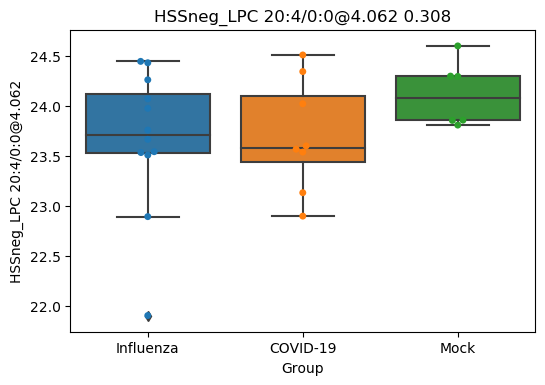

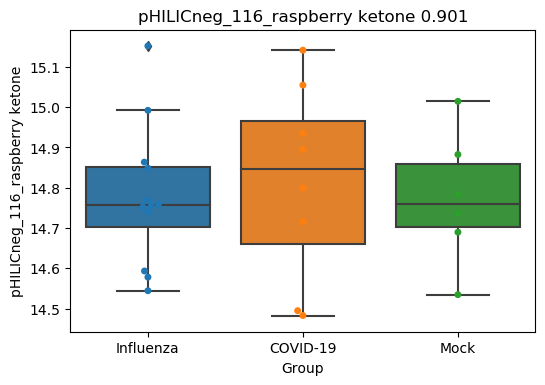

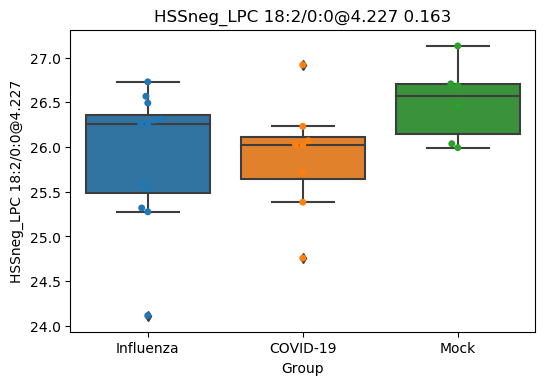

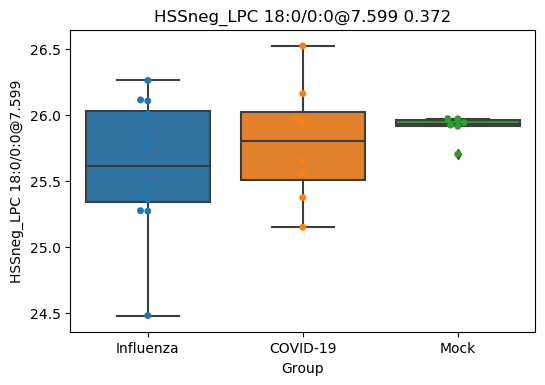

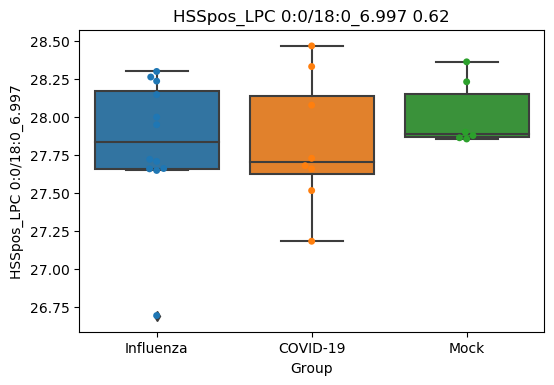

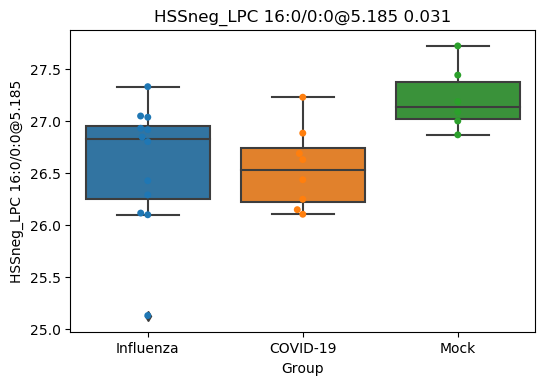

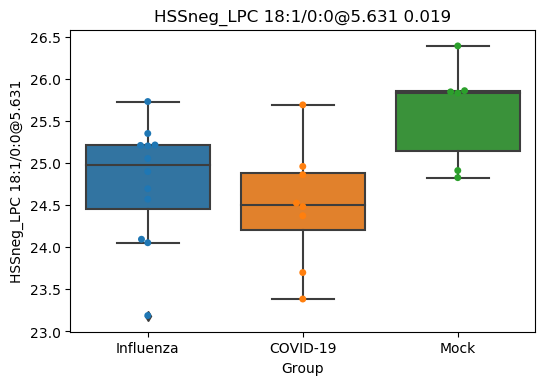

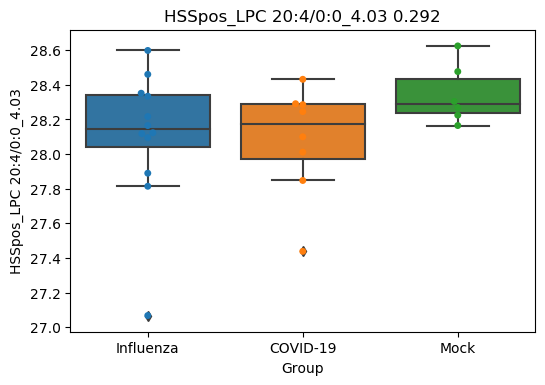

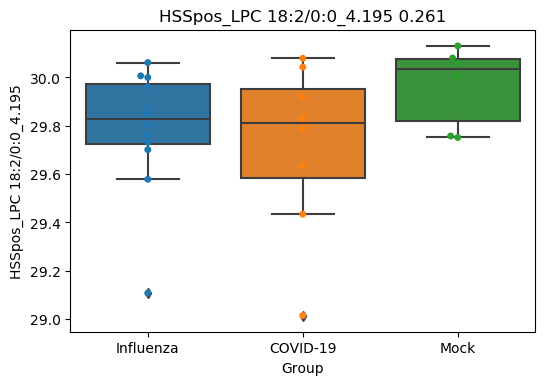

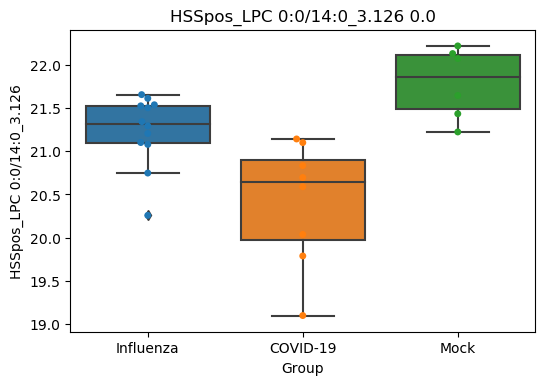

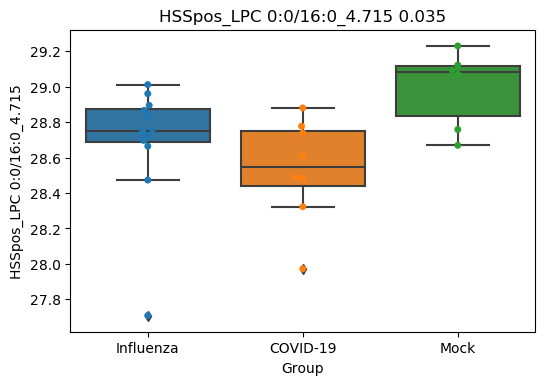

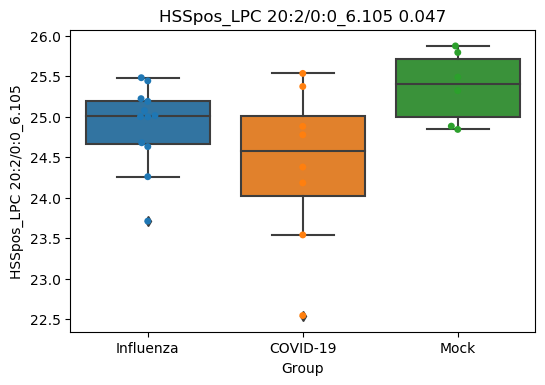

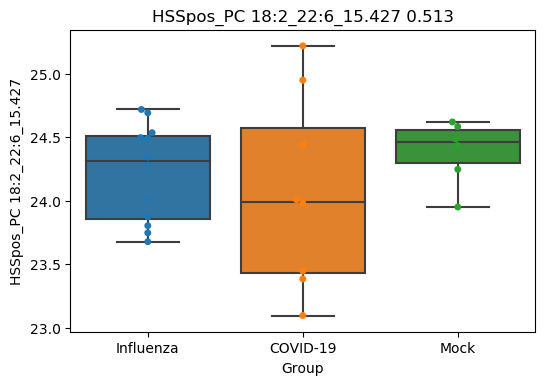

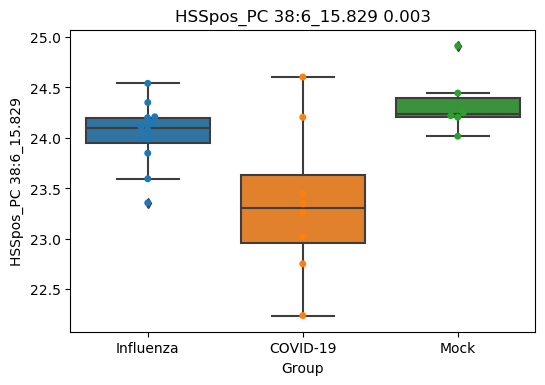

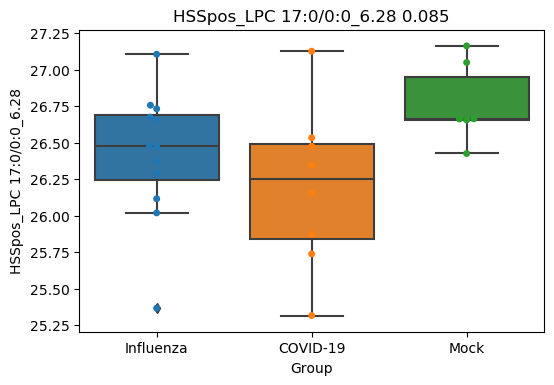

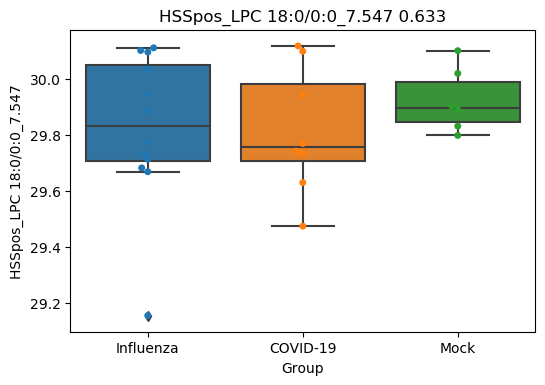

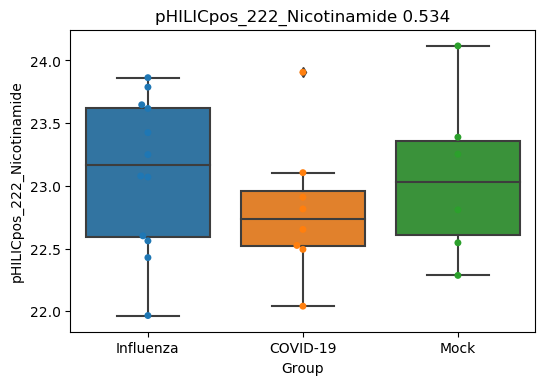

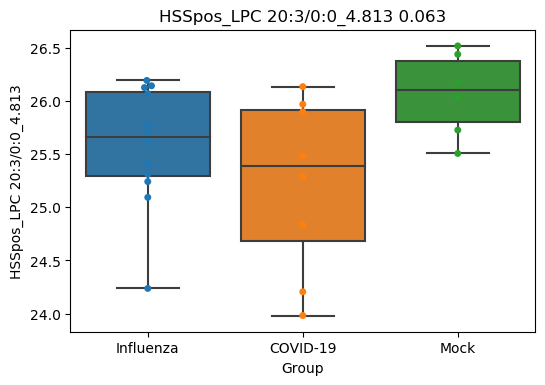

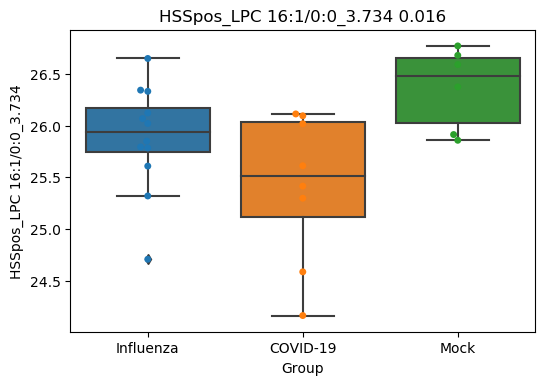

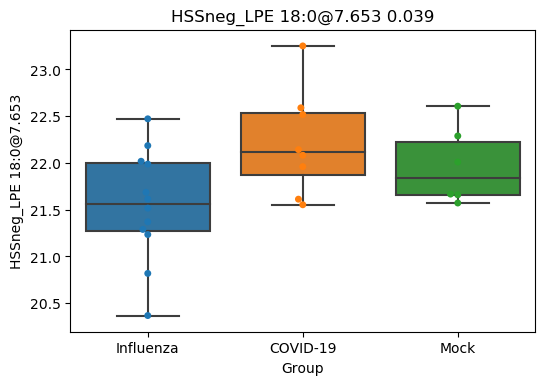

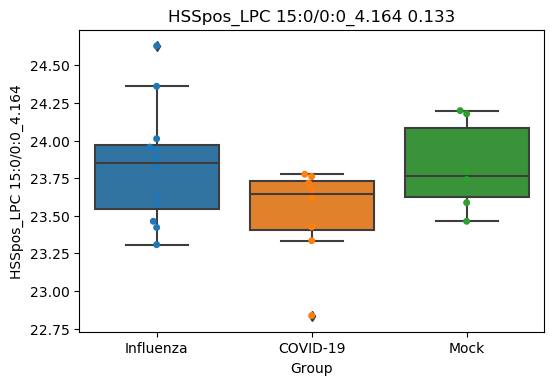

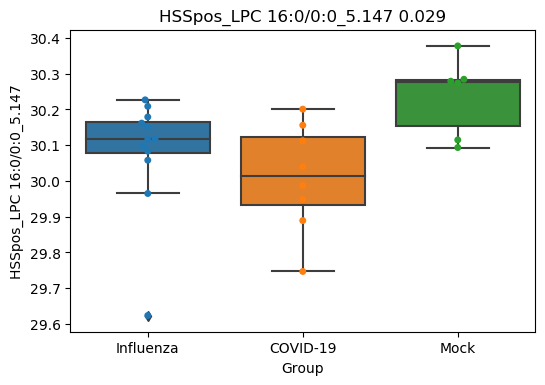

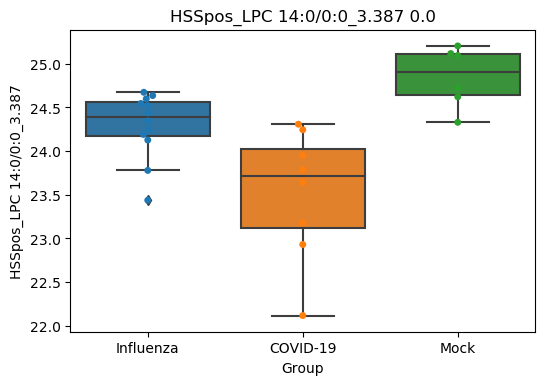

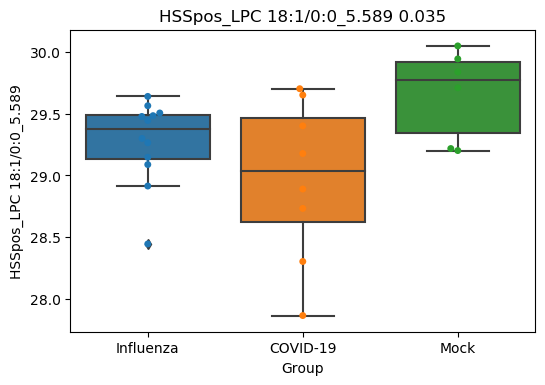

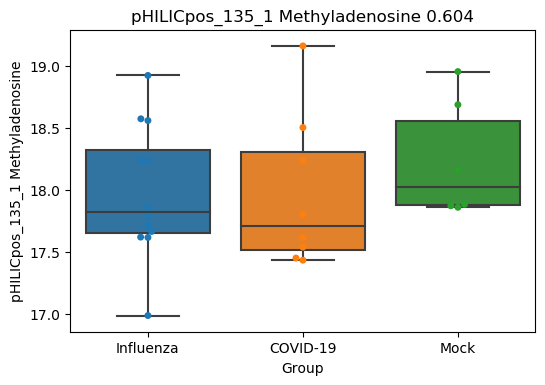

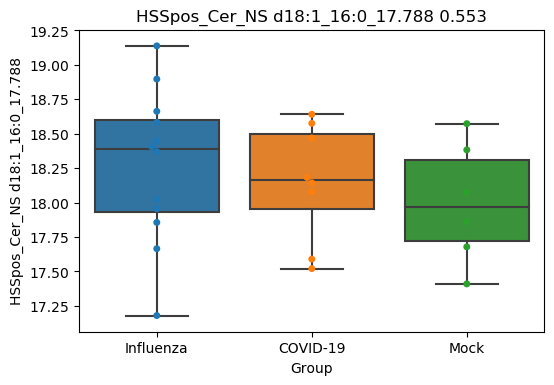

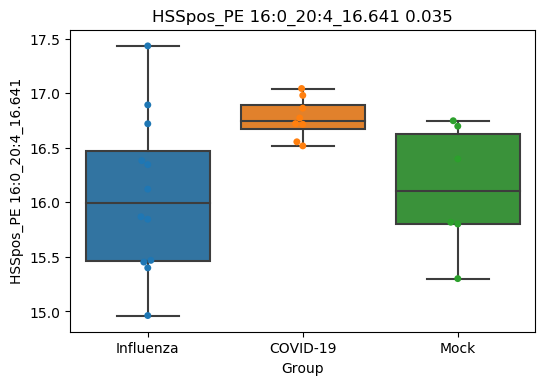

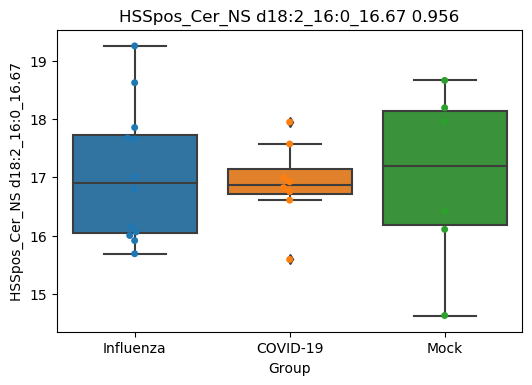

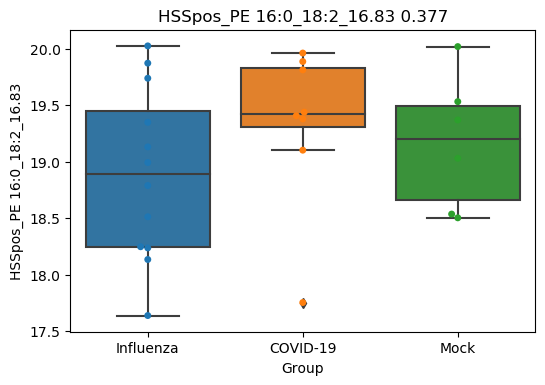

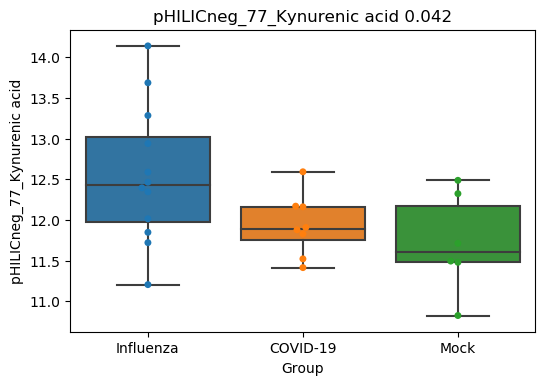

In [16]:
mol_names = data["Compound Name Leg"].values
samples = sample_info.index.values
area_cols = [x for x in data.columns.values if x in samples]
print(len(area_cols),len(samples))
data_matrix = np.log2(data[area_cols].transpose())

var_imp = pd.read_csv("../data/var_importance.csv",index_col=0)

vars_of_interest = []
var_names = []
special_case_mapper = {"pHILICpos_196_Kynurenic acid":"pHILICneg_77_Kynurenic acid"}
for x in var_imp.index.values:
    index = 0
    found = False
    if x in special_case_mapper:
        x = special_case_mapper[x]
    for y in mol_names:
        if "@" in y:
            y = y.split("@")[0]
        if y in x:
            vars_of_interest.append(index)
            var_names.append(x)
            found = True
            break
        index += 1
    if not found:
        index = 0
        for y in mol_names:
            if "@" in y:
                y = y.split("@")[0]
            y = y.replace(y.split("_")[0]+"_","")
            if y in x:
                vars_of_interest.append(index)
                var_names.append(x)
                found = True
                break
            index += 1
    if not found:
        print(x)
        
data_matrix = data_matrix.iloc[:,vars_of_interest]
print(data_matrix.shape)
data_matrix.columns = np.array(var_names)

samplesOfInterest = [x for x in data_matrix.index.values if sample_info.at[x,"Group"] in ["SARS-CoV-2","Influenza","Mock"] and sample_info.at[x,"Day post infection"] in [2,4]]
print(len(samplesOfInterest))
data_matrix = data_matrix.loc[samplesOfInterest,:]

def marker(ty):
    if ty == "Influenza":
        return 1
    elif ty == "SARS-CoV-2":
        return 2
    else:
        return 0
sample_kind_mapping = [marker(sample_info.at[x,"Group"]) for x in data_matrix.index.values]
influenza_samples = [x for x in range(len(sample_kind_mapping)) if sample_kind_mapping[x] == 1]
covid_samples = [x for x in range(len(sample_kind_mapping)) if sample_kind_mapping[x] == 2]
mock_samples = [x for x in range(len(sample_kind_mapping)) if sample_kind_mapping[x] == 0]

alpha = 0.05
pvals = []

for x in range(len(var_names)):
    sub = data_matrix[var_names[x]]
    stat,pval = stats.f_oneway(sub[influenza_samples],sub[covid_samples],sub[mock_samples])
    pvals.append(pval)
#     if pval < alpha/len(mol_names):
#         sig_mets.append(x)
    plot_df = {}
    ind = 0
    for val in sub[influenza_samples]:
        plot_df[ind] = {var_names[x]:val,"Group":"Influenza"}
        ind += 1
    for val in sub[covid_samples]:
        plot_df[ind] = {var_names[x]:val,"Group":"COVID-19"}
        ind += 1
    for val in sub[mock_samples]:
        plot_df[ind] = {var_names[x]:val,"Group":"Mock"}
        ind += 1
    plot_df = pd.DataFrame.from_dict(plot_df,orient="index")
    plt.figure()
    sb.boxplot(data=plot_df,x="Group",y=var_names[x])
    sb.swarmplot(data=plot_df,x="Group",y=var_names[x])
    plt.title(var_names[x] + " " + str(np.round(pval,3)))

print(len(sig_mets))
reject,pvals_corr,_,_ = multipletests(pvals,alpha,method="fdr_bh")
for name,p in zip(var_names,pvals_corr):
    if p < alpha:
        print(name,p)

56 56
HSSpos_PC 20:4_20:4_15.512
HSSpos_CE 22:6_24.09
pHILICneg_120_SORBATE
pHILICpos_212_Linezolid
(56, 30)
12


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

0


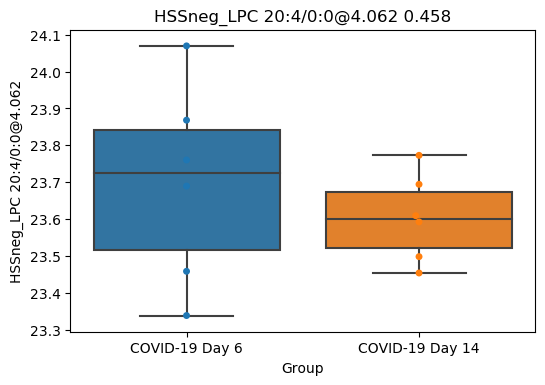

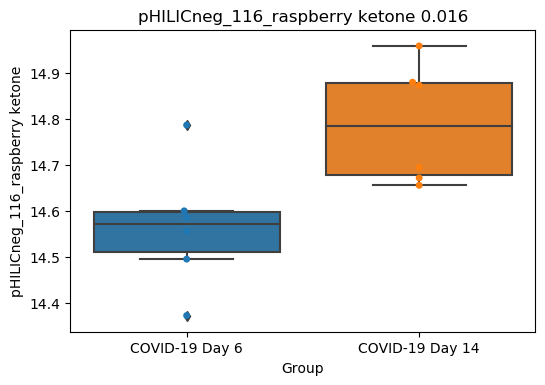

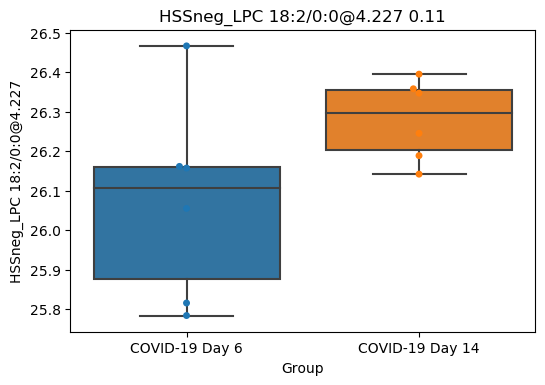

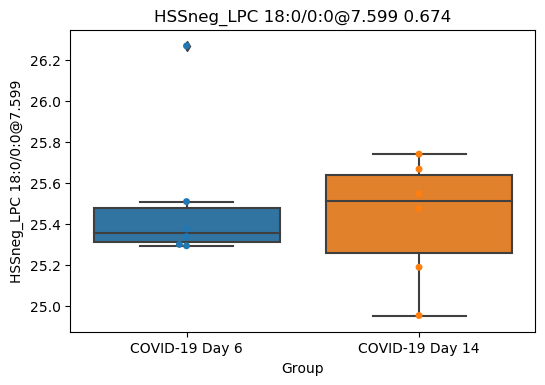

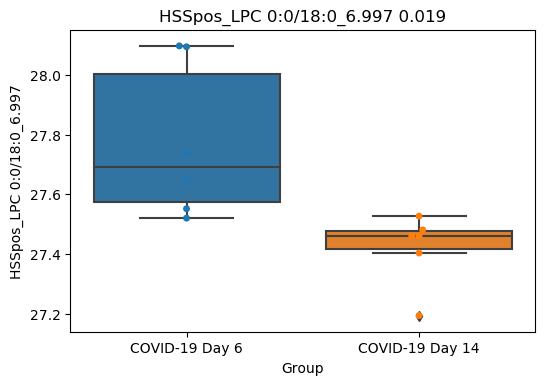

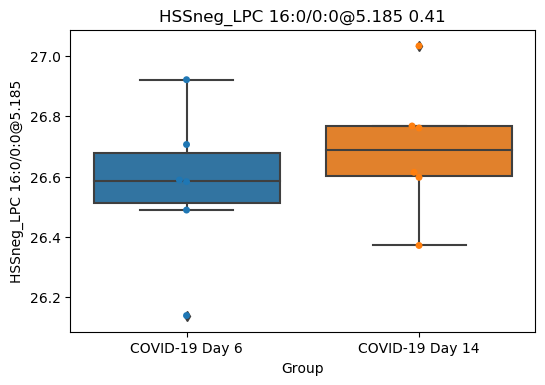

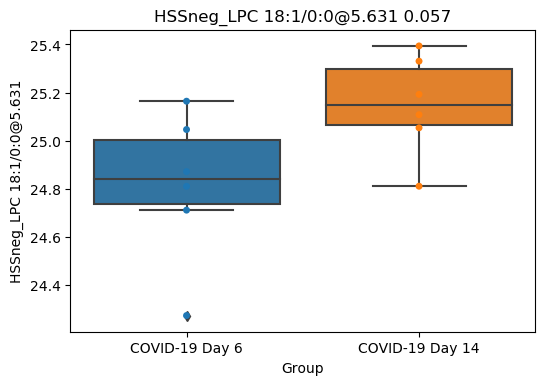

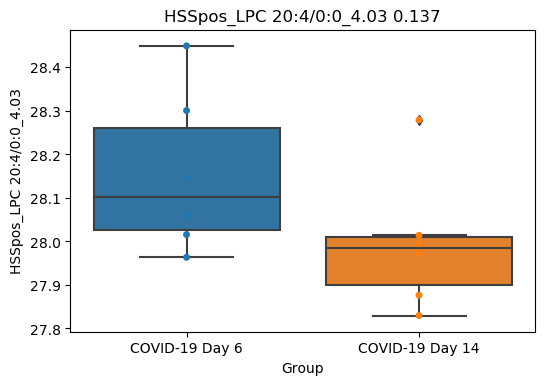

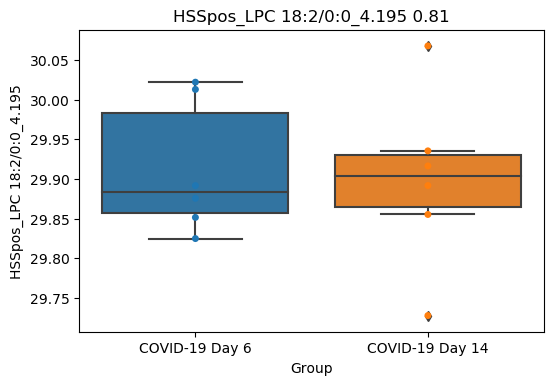

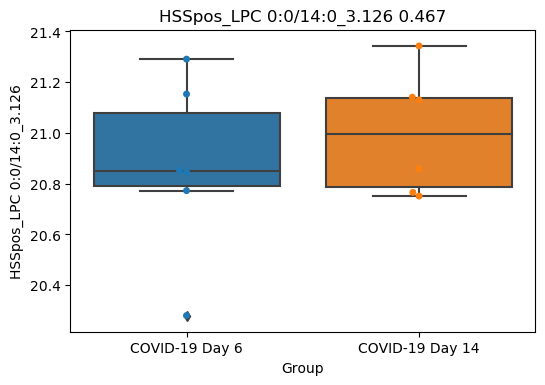

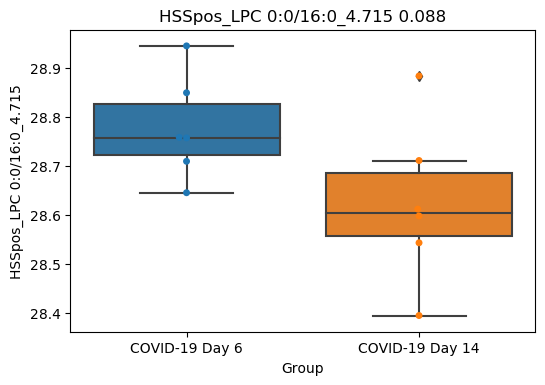

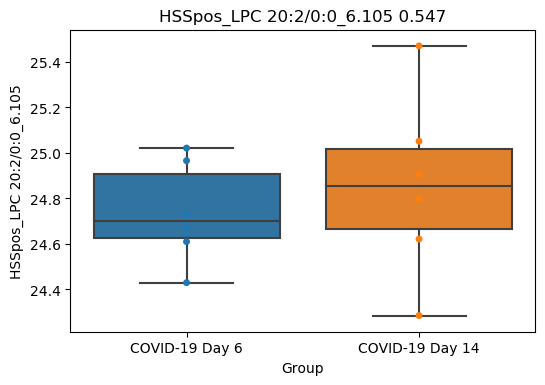

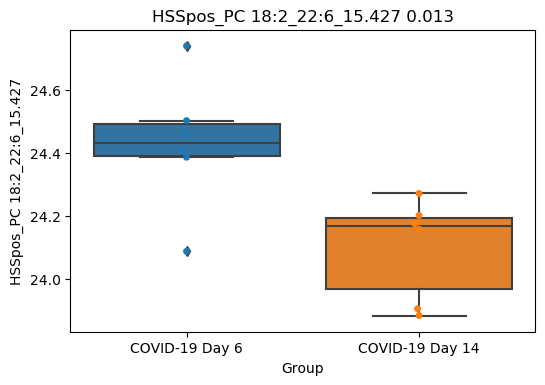

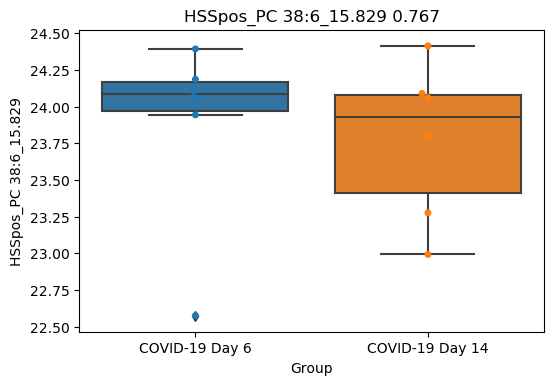

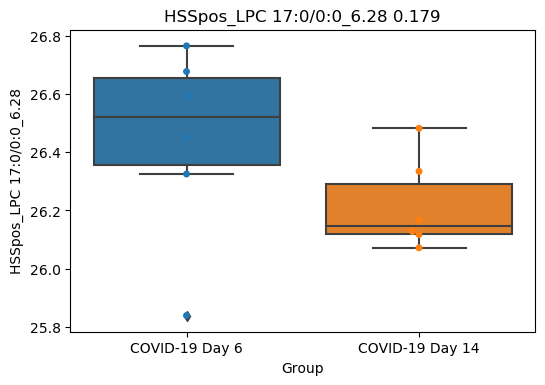

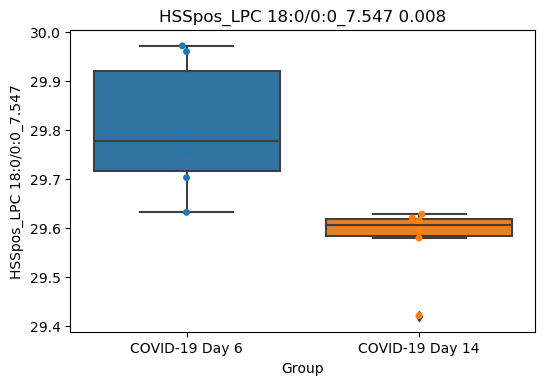

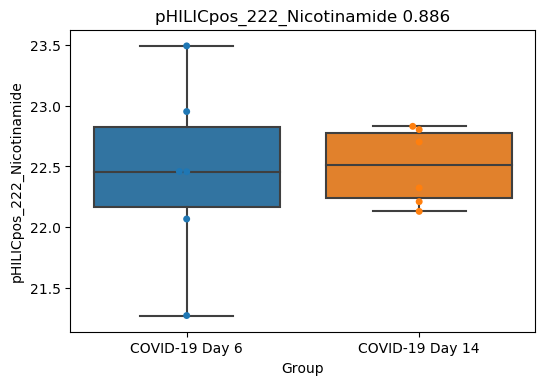

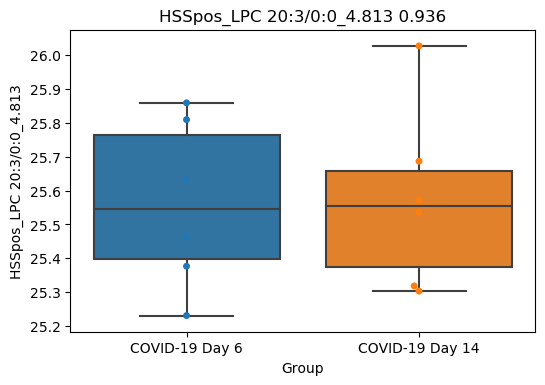

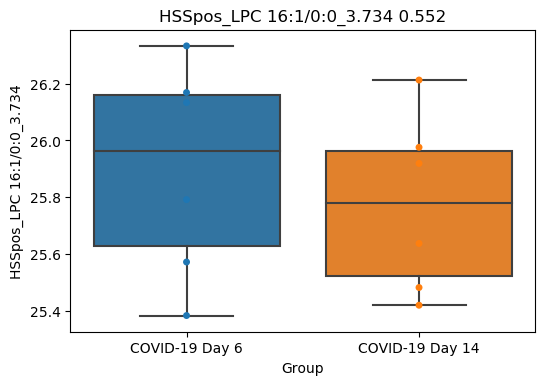

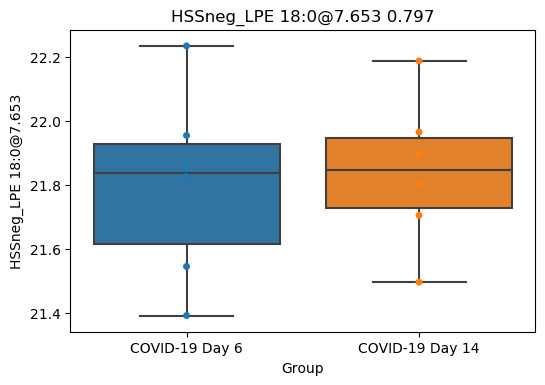

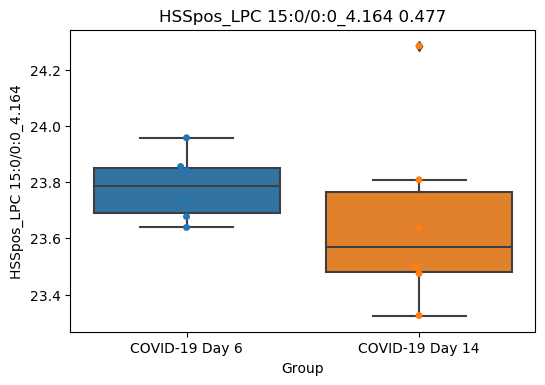

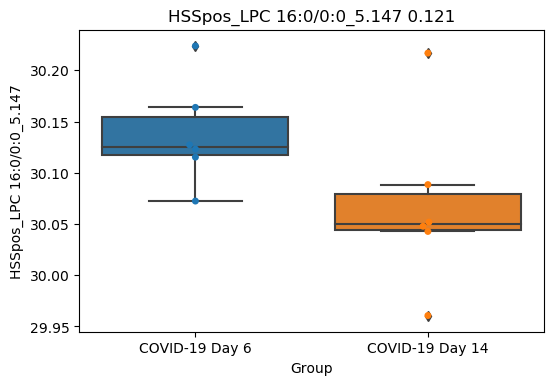

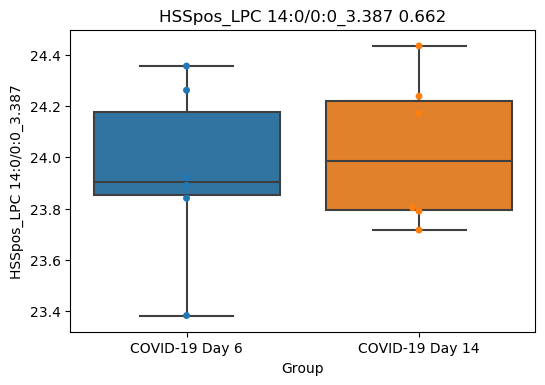

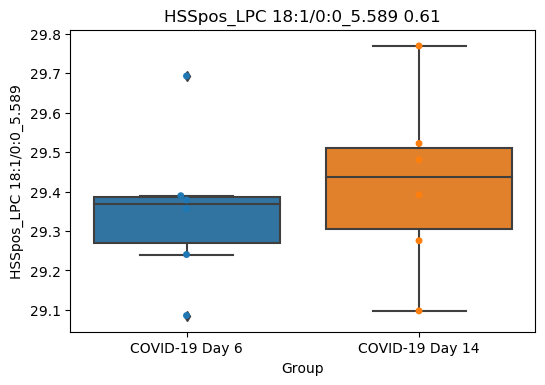

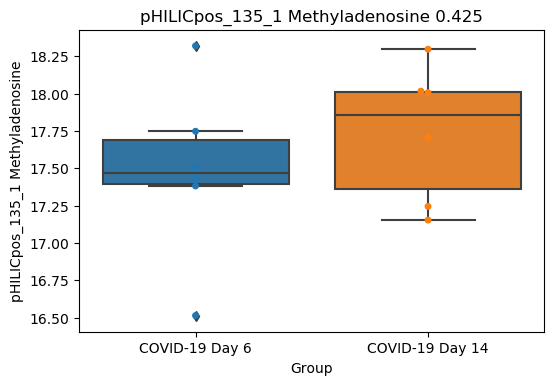

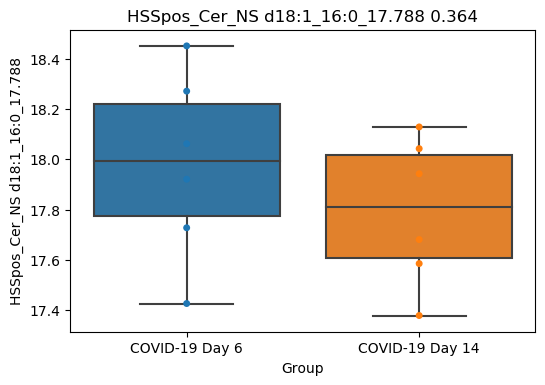

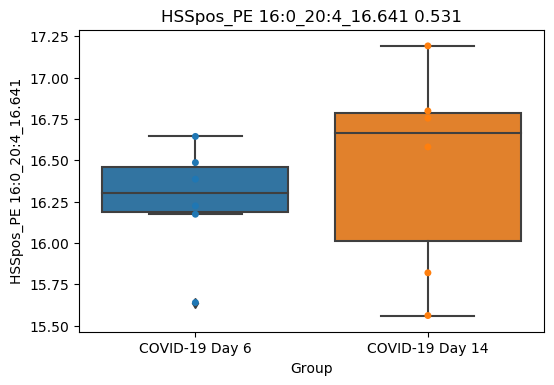

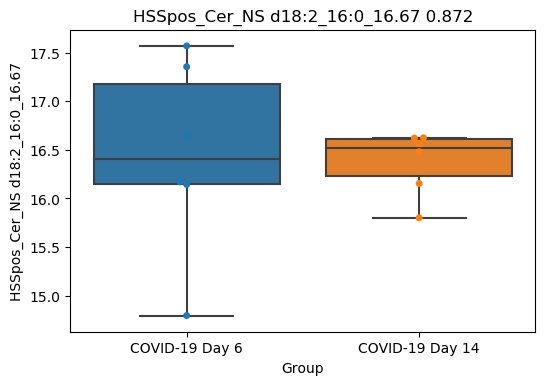

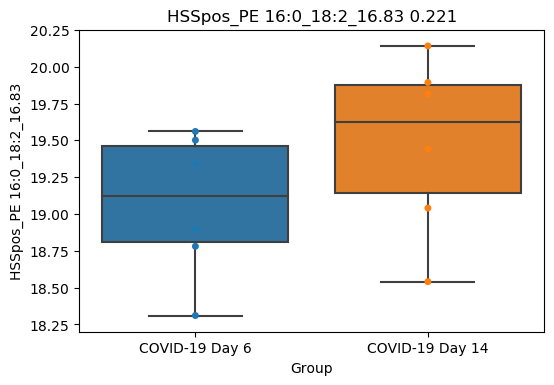

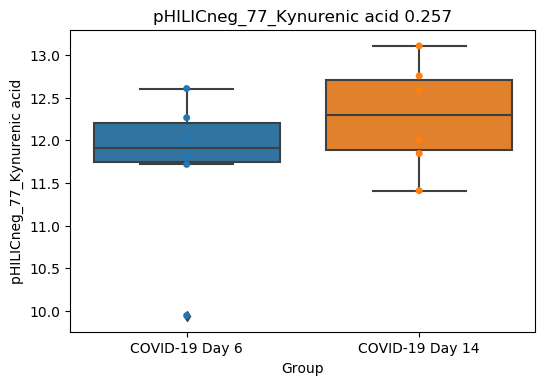

In [17]:
mol_names = data["Compound Name Leg"].values
samples = sample_info.index.values
area_cols = [x for x in data.columns.values if x in samples]
print(len(area_cols),len(samples))
data_matrix = np.log2(data[area_cols].transpose())

var_imp = pd.read_csv("../data/var_importance.csv",index_col=0)

vars_of_interest = []
var_names = []
special_case_mapper = {"pHILICpos_196_Kynurenic acid":"pHILICneg_77_Kynurenic acid"}
for x in var_imp.index.values:
    index = 0
    found = False
    if x in special_case_mapper:
        x = special_case_mapper[x]
    for y in mol_names:
        if "@" in y:
            y = y.split("@")[0]
        if y in x:
            vars_of_interest.append(index)
            var_names.append(x)
            found = True
            break
        index += 1
    if not found:
        index = 0
        for y in mol_names:
            if "@" in y:
                y = y.split("@")[0]
            y = y.replace(y.split("_")[0]+"_","")
            if y in x:
                vars_of_interest.append(index)
                var_names.append(x)
                found = True
                break
            index += 1
    if not found:
        print(x)
        
data_matrix = data_matrix.iloc[:,vars_of_interest]
print(data_matrix.shape)
data_matrix.columns = np.array(var_names)

samplesOfInterest = [x for x in data_matrix.index.values if sample_info.at[x,"Group"] in ["SARS-CoV-2"] and sample_info.at[x,"Day post infection"] in [6,14]]
print(len(samplesOfInterest))
data_matrix = data_matrix.loc[samplesOfInterest,:]


sample_kind_mapping = [sample_info.at[x,"Day post infection"] for x in data_matrix.index.values]
covid_samples_severe = [x for x in range(len(sample_kind_mapping)) if sample_kind_mapping[x] == 6]
covid_samples_moderate = [x for x in range(len(sample_kind_mapping)) if sample_kind_mapping[x] == 14]

alpha = 0.05
sig_mets = []
pvals = []
for x in range(len(var_names)):
    sub = data_matrix[var_names[x]]
    stat,pval = stats.ttest_ind(sub[covid_samples_severe],sub[covid_samples_moderate],equal_var=False)
    pvals.append(pval)
#     if pval < alpha/len(mol_names):
#         sig_mets.append(x)
    plot_df = {}
    ind = 0
    for val in sub[covid_samples_severe]:
        plot_df[ind] = {var_names[x]:val,"Group":"COVID-19 Day 6"}
        ind += 1
    for val in sub[covid_samples_moderate]:
        plot_df[ind] = {var_names[x]:val,"Group":"COVID-19 Day 14"}
        ind += 1

    plot_df = pd.DataFrame.from_dict(plot_df,orient="index")
    plt.figure()
    sb.boxplot(data=plot_df,x="Group",y=var_names[x])
    sb.swarmplot(data=plot_df,x="Group",y=var_names[x])
    plt.title(var_names[x] + " " + str(np.round(pval,3)))

print(len(sig_mets))
reject,pvals_corr,_,_ = multipletests(pvals,alpha,method="fdr_bh")
for name,p in zip(var_names,pvals_corr):
    if p < alpha:
        print(name,p)
# order = list(range(len(data_matrix)))
# order.sort(key=lambda x: sample_kind_mapping[x])
# data_matrix_sorted = data_matrix.iloc[order,sig_mets]

56 56
HSSpos_CE 22:6_24.09
HSSpos_PC 20:4_20:4_15.512
pHILICneg_120_SORBATE
pHILICpos_212_Linezolid
(56, 30)
20
0
HSSneg_LPC 18:1/0:0@5.631 0.02499839614448411
HSSneg_LPE 18:0@7.653 0.009108816942212253
HSSpos_LPC 0:0/14:0_3.126 0.020074027867451376
HSSpos_LPC 0:0/16:0_4.715 0.020074027867451376
HSSpos_LPC 0:0/18:0_6.997 0.0208461282612008
HSSpos_LPC 14:0/0:0_3.387 0.0208461282612008
HSSpos_LPC 16:0/0:0_5.147 0.011628800633134298
HSSpos_LPC 16:1/0:0_3.734 0.0208461282612008
HSSpos_LPC 17:0/0:0_6.28 0.0258106042189701
HSSpos_LPC 18:0/0:0_7.547 0.020074027867451376
HSSpos_LPC 18:1/0:0_5.589 0.009108816942212253
HSSpos_LPC 18:2/0:0_4.195 0.0208461282612008
HSSpos_LPC 20:2/0:0_6.105 0.03287526274049923
HSSpos_PC 18:2_22:6_15.427 0.00202838931687101


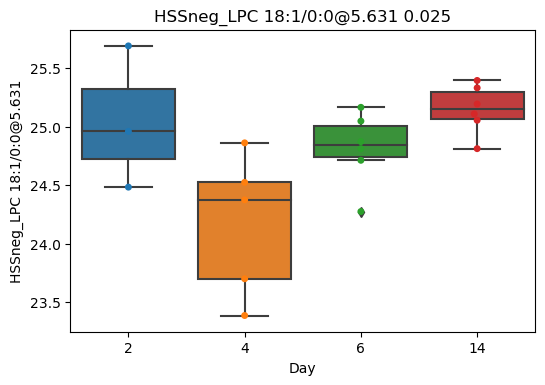

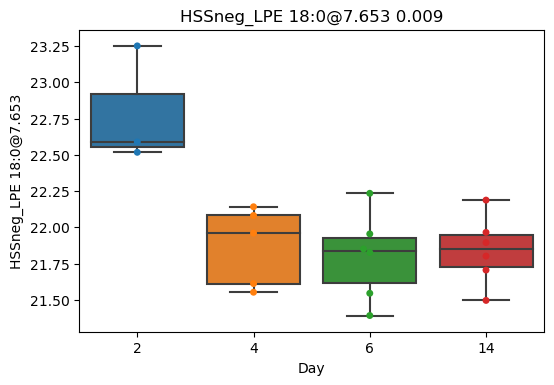

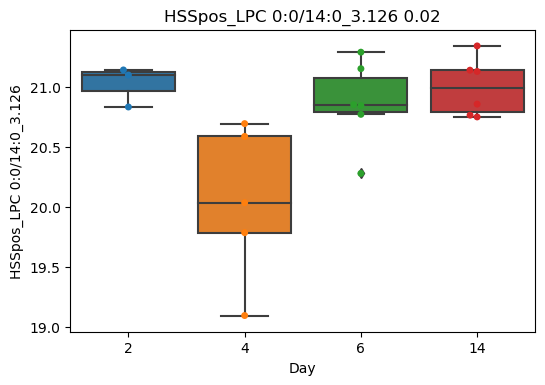

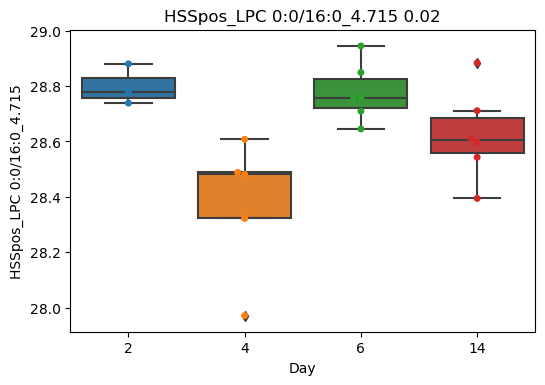

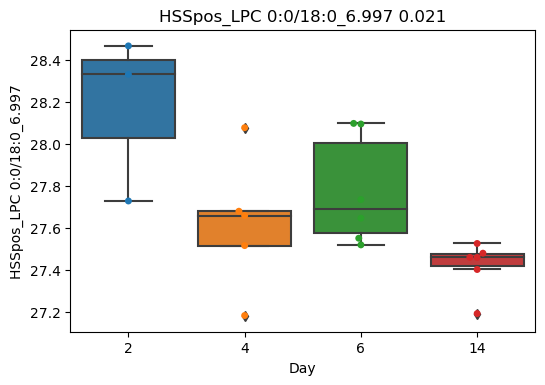

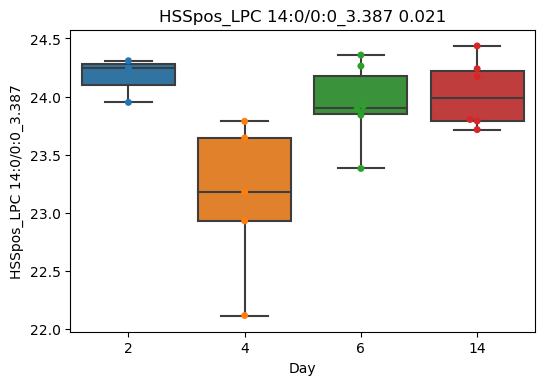

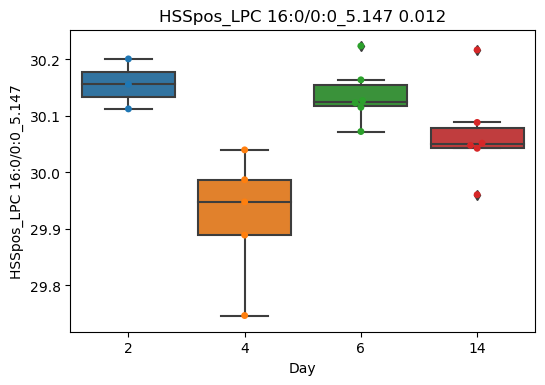

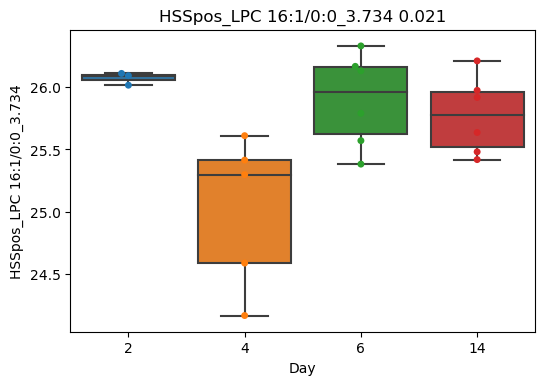

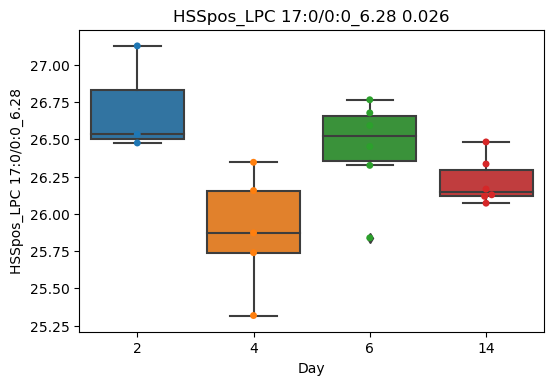

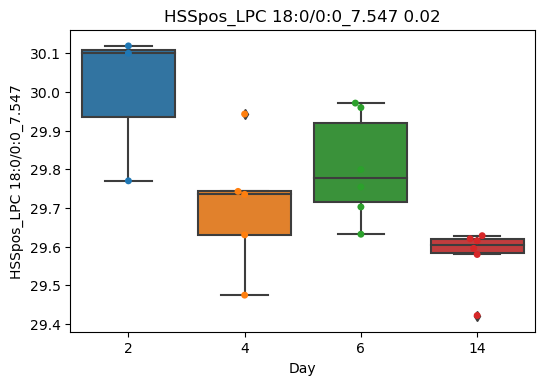

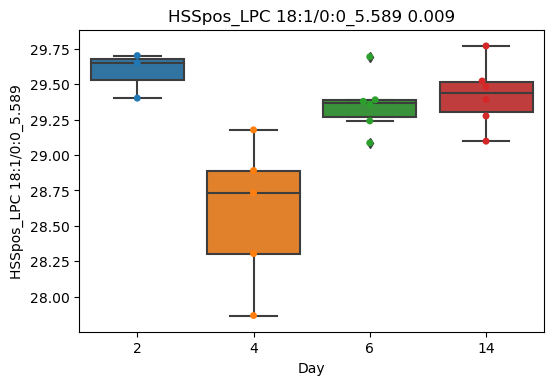

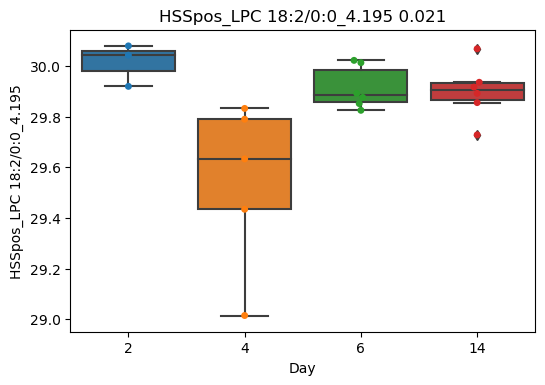

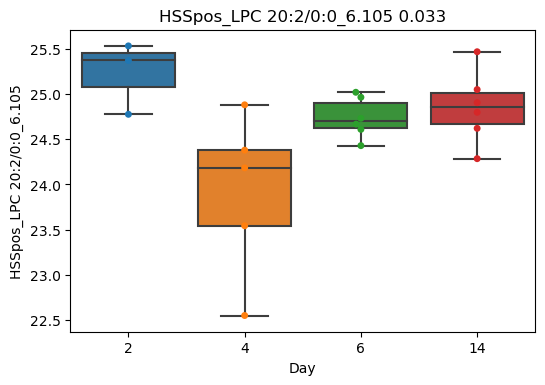

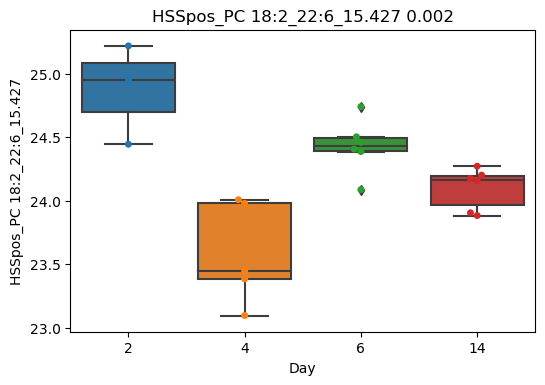

In [25]:
mol_names = data["Compound Name Leg"].values
samples = sample_info.index.values
area_cols = [x for x in data.columns.values if x in samples]
print(len(area_cols),len(samples))
data_matrix = np.log2(data[area_cols].transpose())

var_imp = pd.read_csv("../data/var_importance.csv",index_col=0)

vars_of_interest = []
var_names = []
special_case_mapper = {"pHILICpos_196_Kynurenic acid":"pHILICneg_77_Kynurenic acid"}
for x in var_imp.index.values:
    index = 0
    found = False
    if x in special_case_mapper:
        x = special_case_mapper[x]
    for y in mol_names:
        if "@" in y:
            y = y.split("@")[0]
        if y in x:
            vars_of_interest.append(index)
            var_names.append(x)
            found = True
            break
        index += 1
    if not found:
        index = 0
        for y in mol_names:
            if "@" in y:
                y = y.split("@")[0]
            y = y.replace(y.split("_")[0]+"_","")
            if y in x:
                vars_of_interest.append(index)
                var_names.append(x)
                found = True
                break
            index += 1
    if not found:
        print(x)
        
data_matrix = data_matrix.iloc[:,vars_of_interest]
print(data_matrix.shape)
data_matrix.columns = np.array(var_names)

samplesOfInterest = [x for x in data_matrix.index.values if sample_info.at[x,"Group"] in ["SARS-CoV-2"] and sample_info.at[x,"Day post infection"] in [2,4,6,14]]
print(len(samplesOfInterest))
data_matrix = data_matrix.loc[samplesOfInterest,:]

sample_kind_mapping = [sample_info.at[x,"Day post infection"] for x in data_matrix.index.values]

alpha = 0.05
sig_mets = []
pvals = []
plot_dfs = []
for x in range(len(var_names)):
    sub = data_matrix[var_names[x]]

    plot_df = {}
    ind = 0
    for val,kind in zip(sub,sample_kind_mapping):
        plot_df[ind] = {var_names[x]:val,"Day":kind}
        ind += 1

    plot_df = pd.DataFrame.from_dict(plot_df,orient="index")
    
    stat,pval = stats.f_oneway(*[plot_df[plot_df["Day"] == d][var_names[x]].values for d in [2,4,6,14]])

#     if pval < alpha/len(mol_names):
#         sig_mets.append(x)
    pvals.append(pval)
        
    plot_dfs.append(plot_df)
#     plt.figure()
#     sb.boxplot(data=plot_df,x="Day",y=var_names[x])
#     sb.swarmplot(data=plot_df,x="Day",y=var_names[x])
#     plt.title(var_names[x] + " " + str(np.round(pval,3)))

print(len(sig_mets))
reject,pvals_corr,_,_ = multipletests(pvals,alpha,method="fdr_bh")
for name,p,plot_df in zip(var_names,pvals_corr,plot_dfs):
    if p < alpha:
        print(name,p)
        plt.figure()
        sb.boxplot(data=plot_df,x="Day",y=name)
        sb.swarmplot(data=plot_df,x="Day",y=name)
        plt.title(name + " " + str(np.round(p,3)))

56 56
HSSpos_CE 22:6_24.09
HSSpos_PC 20:4_20:4_15.512
pHILICneg_120_SORBATE
pHILICpos_212_Linezolid
(56, 30)
24
0
HSSneg_LPC 16:0/0:0@5.185 0.0486748878879084
HSSneg_LPC 18:1/0:0@5.631 0.019440382335929356
HSSneg_LPC 18:2/0:0@4.227 0.04454449882228388
HSSpos_LPC 0:0/14:0_3.126 0.036126025842546705
HSSpos_LPC 14:0/0:0_3.387 0.019440382335929356
HSSpos_LPC 16:0/0:0_5.147 0.04454449882228388
HSSpos_LPC 16:1/0:0_3.734 0.028956650196123077
HSSpos_LPC 18:0/0:0_7.547 0.04454449882228388
HSSpos_LPC 18:1/0:0_5.589 0.01246292382043838
HSSpos_LPC 18:2/0:0_4.195 0.036126025842546705
HSSpos_LPC 20:2/0:0_6.105 0.019440382335929356
HSSpos_LPC 20:3/0:0_4.813 0.01246292382043838
HSSpos_LPC 20:4/0:0_4.03 0.036126025842546705
HSSpos_PC 38:6_15.829 0.036126025842546705
HSSpos_PE 16:0_20:4_16.641 0.03838793207645366
pHILICpos_135_1 Methyladenosine 0.019440382335929356
pHILICpos_222_Nicotinamide 0.019440382335929356


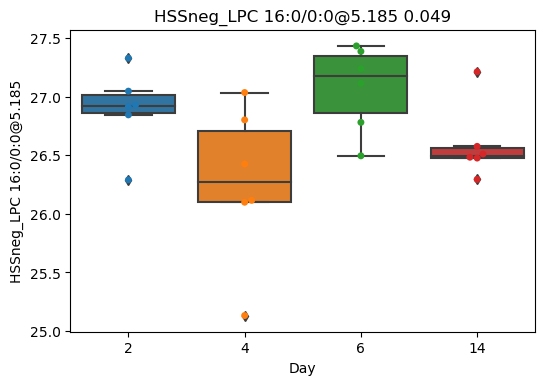

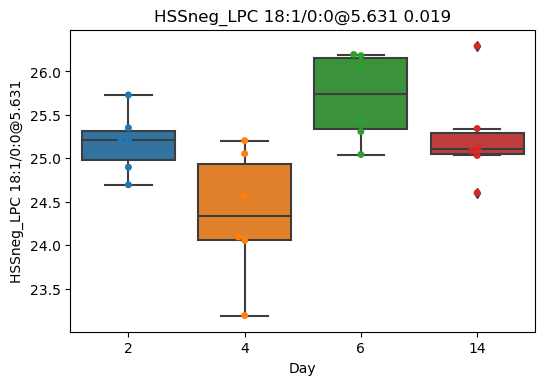

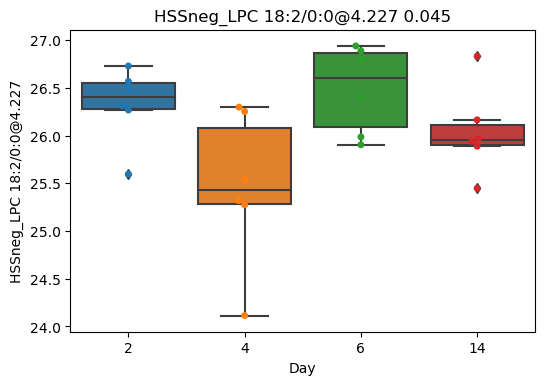

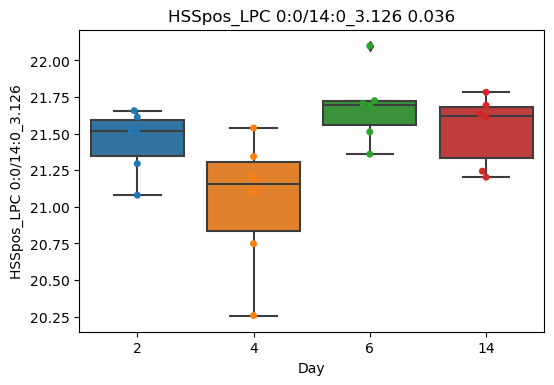

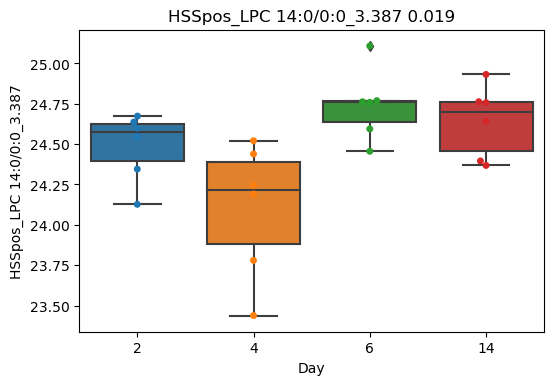

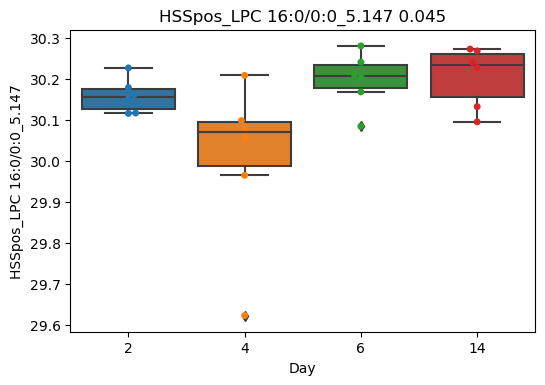

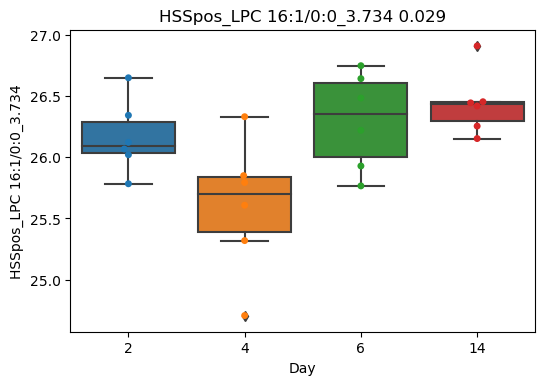

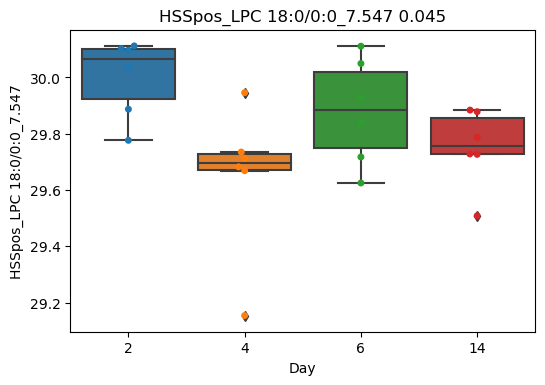

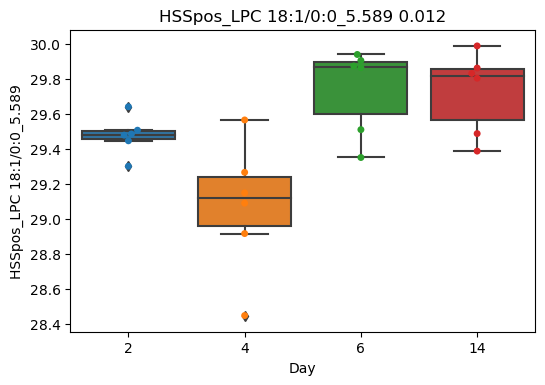

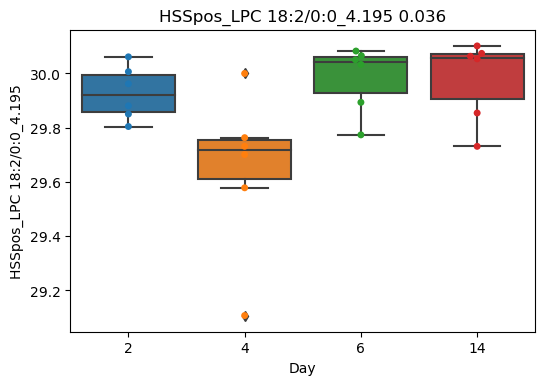

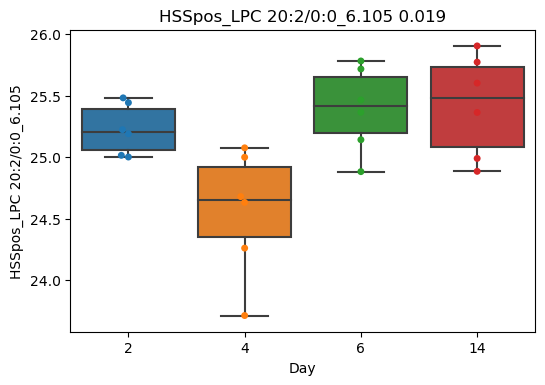

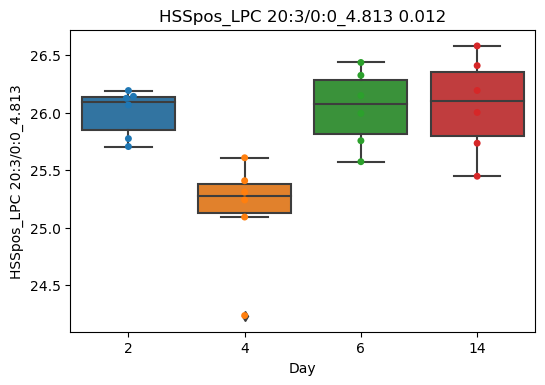

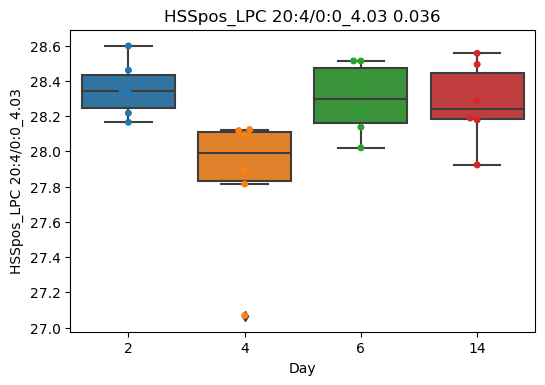

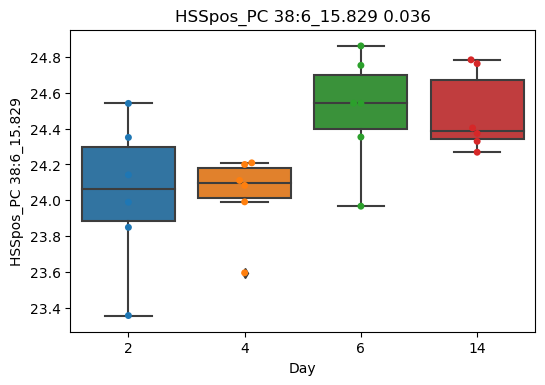

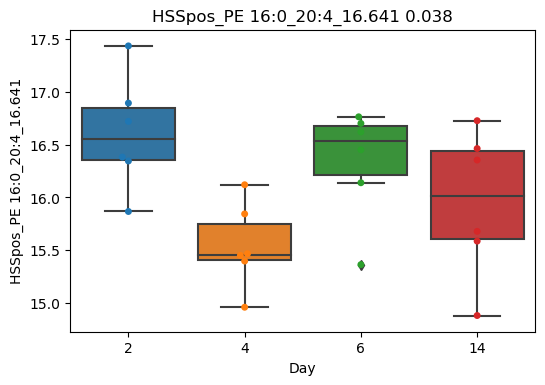

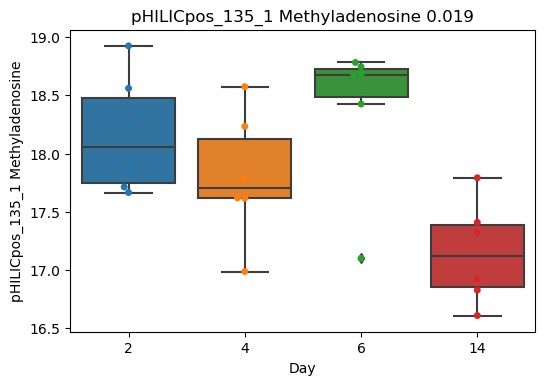

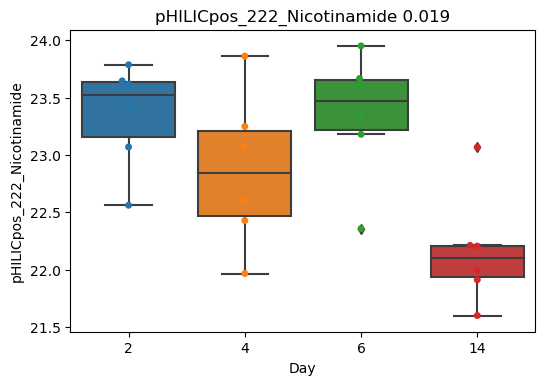

In [23]:
mol_names = data["Compound Name Leg"].values
samples = sample_info.index.values
area_cols = [x for x in data.columns.values if x in samples]
print(len(area_cols),len(samples))
data_matrix = np.log2(data[area_cols].transpose())

var_imp = pd.read_csv("../data/var_importance.csv",index_col=0)

vars_of_interest = []
var_names = []
special_case_mapper = {"pHILICpos_196_Kynurenic acid":"pHILICneg_77_Kynurenic acid"}
for x in var_imp.index.values:
    index = 0
    found = False
    if x in special_case_mapper:
        x = special_case_mapper[x]
    for y in mol_names:
        if "@" in y:
            y = y.split("@")[0]
        if y in x:
            vars_of_interest.append(index)
            var_names.append(x)
            found = True
            break
        index += 1
    if not found:
        index = 0
        for y in mol_names:
            if "@" in y:
                y = y.split("@")[0]
            y = y.replace(y.split("_")[0]+"_","")
            if y in x:
                vars_of_interest.append(index)
                var_names.append(x)
                found = True
                break
            index += 1
    if not found:
        print(x)
        
data_matrix = data_matrix.iloc[:,vars_of_interest]
print(data_matrix.shape)
data_matrix.columns = np.array(var_names)

samplesOfInterest = [x for x in data_matrix.index.values if sample_info.at[x,"Group"] in ["Influenza"] and sample_info.at[x,"Day post infection"] in [2,4,6,14]]
print(len(samplesOfInterest))
data_matrix = data_matrix.loc[samplesOfInterest,:]

sample_kind_mapping = [sample_info.at[x,"Day post infection"] for x in data_matrix.index.values]

alpha = 0.05
sig_mets = []
pvals = []
plot_dfs = []
for x in range(len(var_names)):
    sub = data_matrix[var_names[x]]

    plot_df = {}
    ind = 0
    for val,kind in zip(sub,sample_kind_mapping):
        plot_df[ind] = {var_names[x]:val,"Day":kind}
        ind += 1

    plot_df = pd.DataFrame.from_dict(plot_df,orient="index")
    
    stat,pval = stats.f_oneway(*[plot_df[plot_df["Day"] == d][var_names[x]].values for d in [2,4,6,14]])

#     if pval < alpha/len(mol_names):
#         sig_mets.append(x)
    pvals.append(pval)
    plot_dfs.append(plot_df)

print(len(sig_mets))
reject,pvals_corr,_,_ = multipletests(pvals,alpha,method="fdr_bh")
for name,p,plot_df in zip(var_names,pvals_corr,plot_dfs):
    if p < alpha:
        print(name,p)
        plt.figure()
        sb.boxplot(data=plot_df,x="Day",y=name)
        sb.swarmplot(data=plot_df,x="Day",y=name)
        plt.title(name + " " + str(np.round(p,3)))

56 56
HSSpos_PC 20:4_20:4_15.512
HSSpos_CE 22:6_24.09
pHILICneg_120_SORBATE
pHILICpos_212_Linezolid
(56, 30)
12


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

0


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


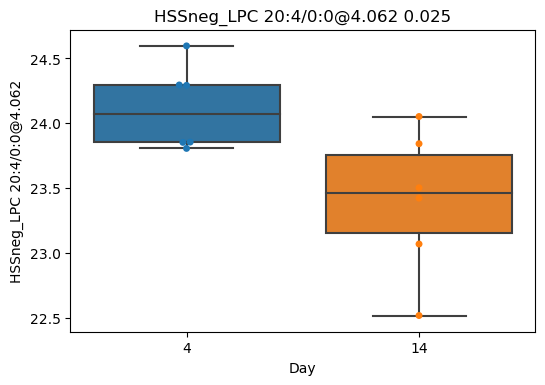

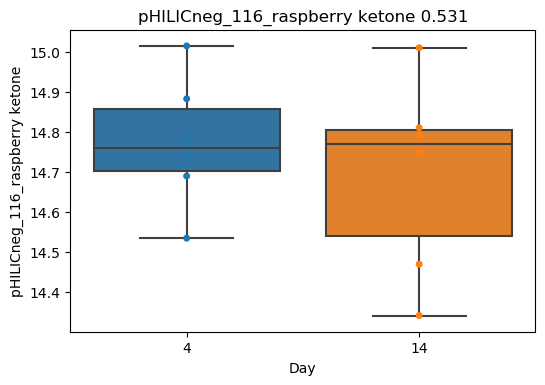

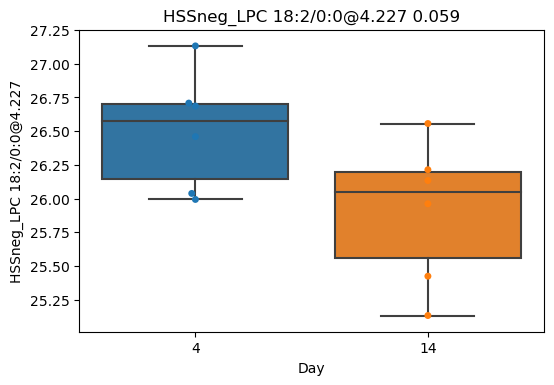

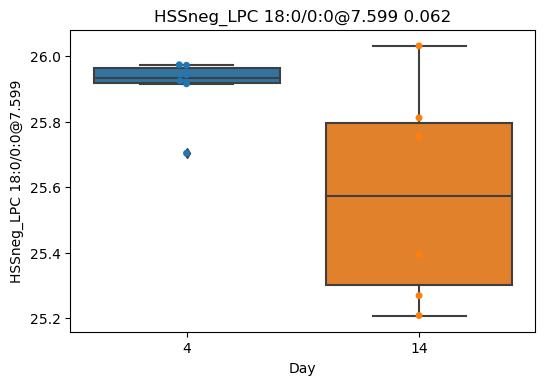

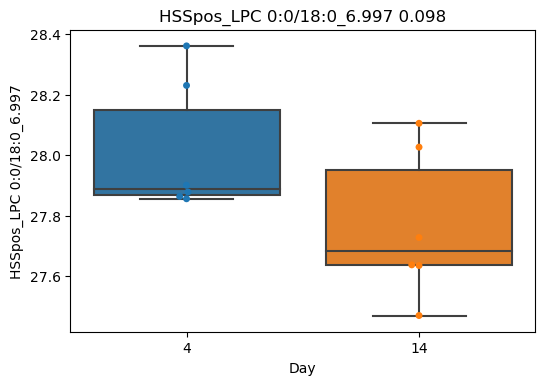

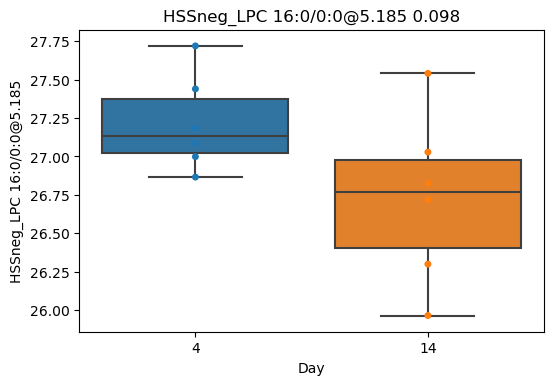

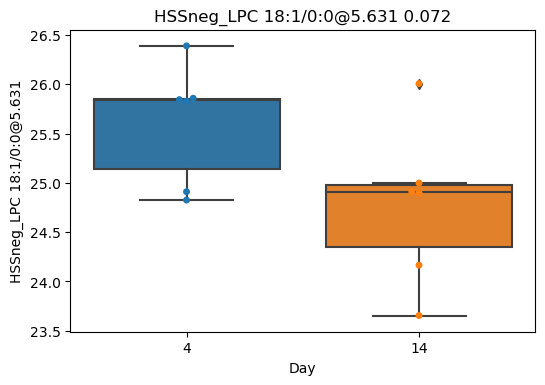

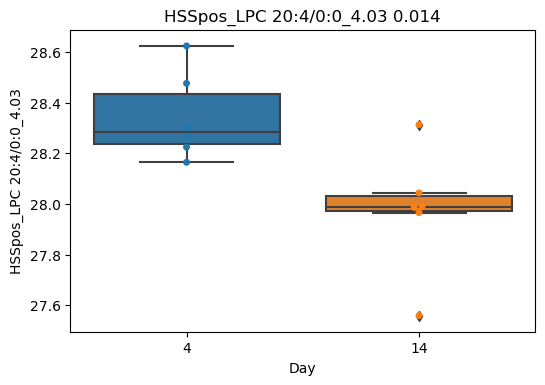

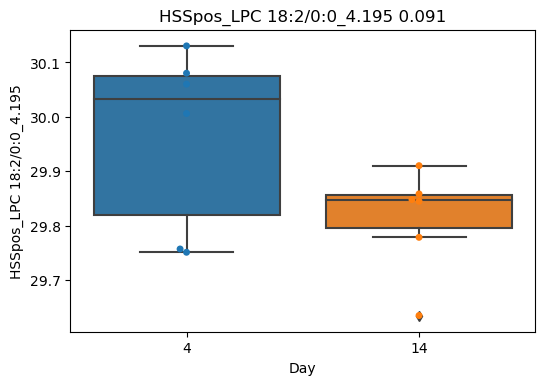

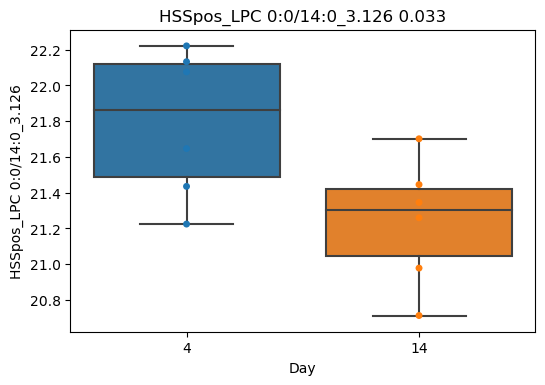

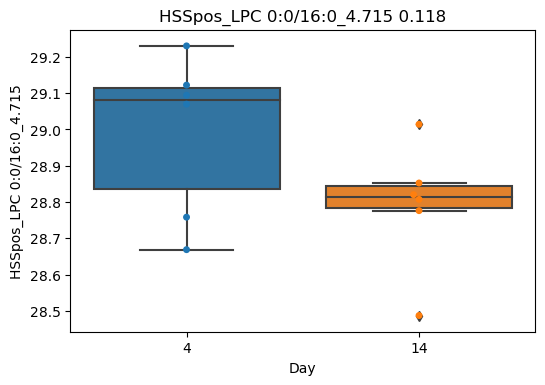

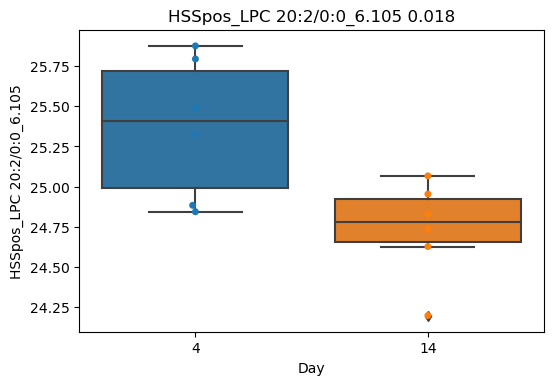

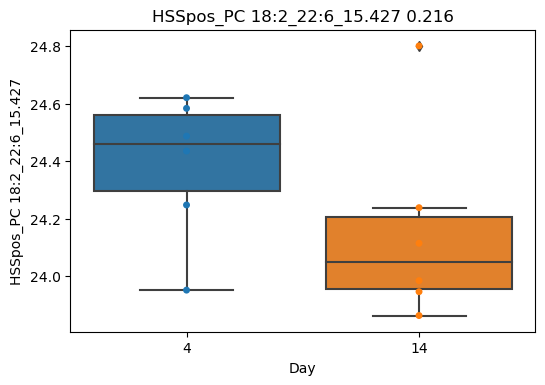

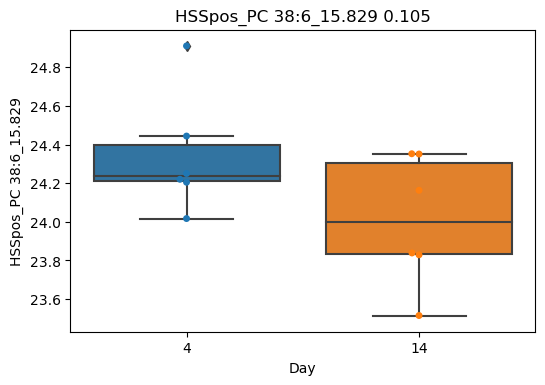

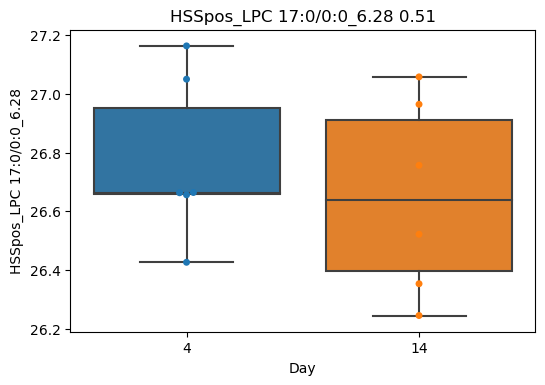

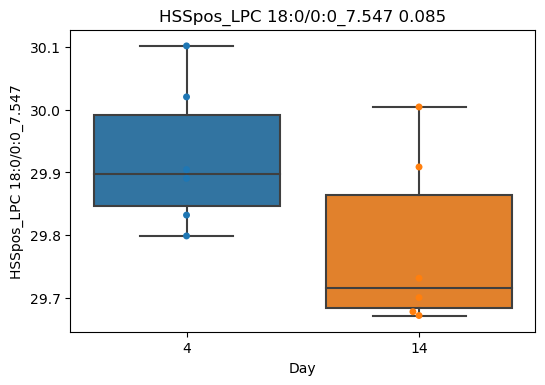

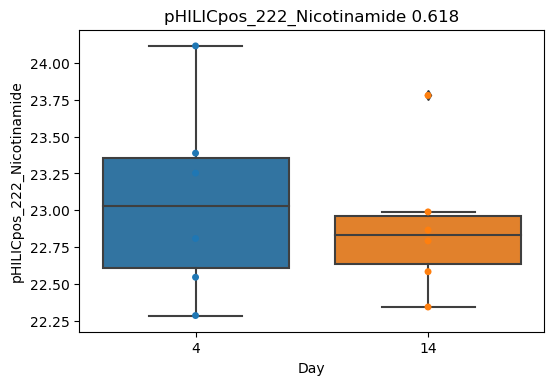

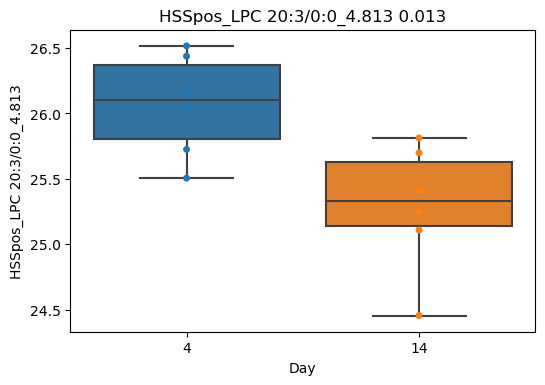

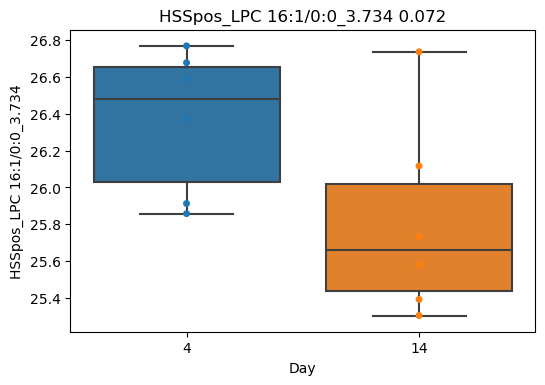

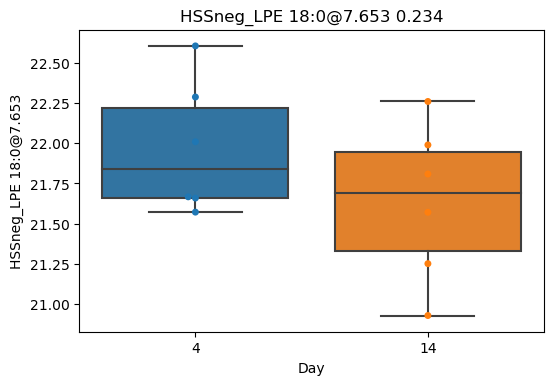

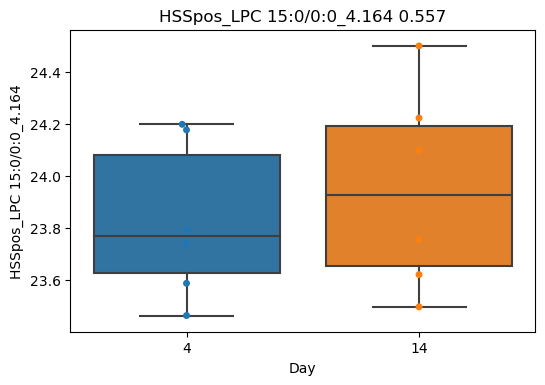

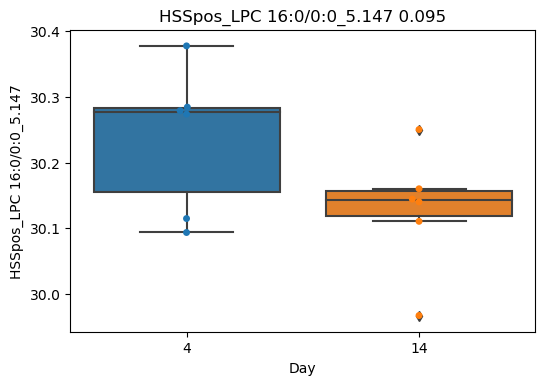

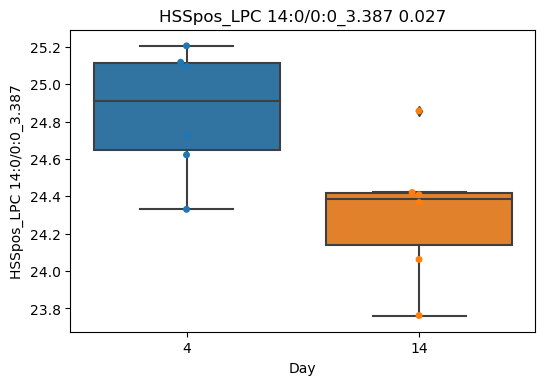

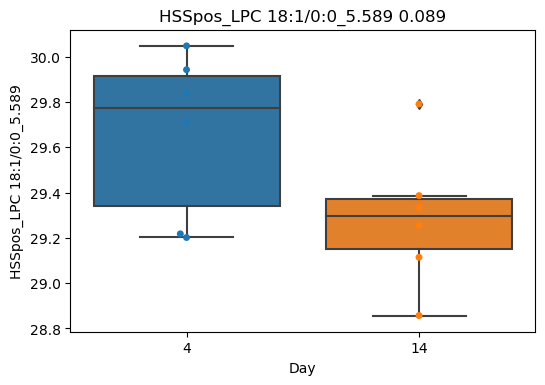

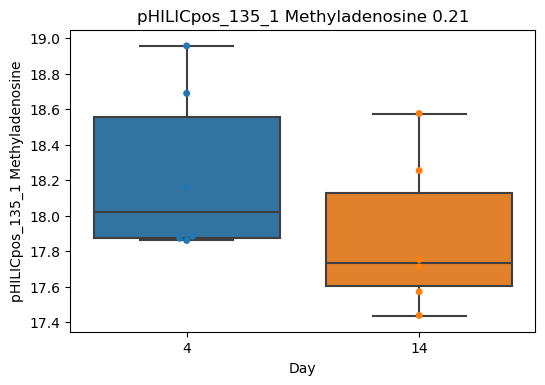

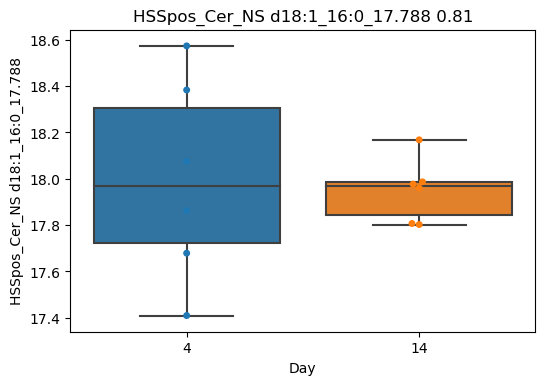

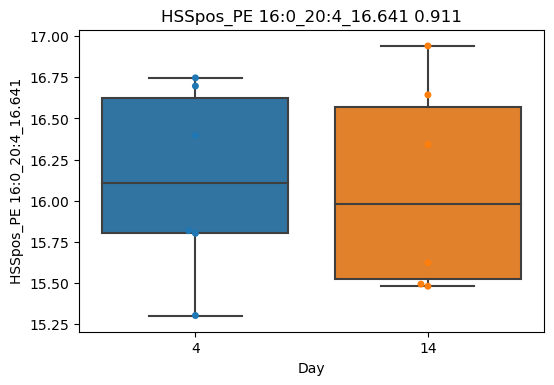

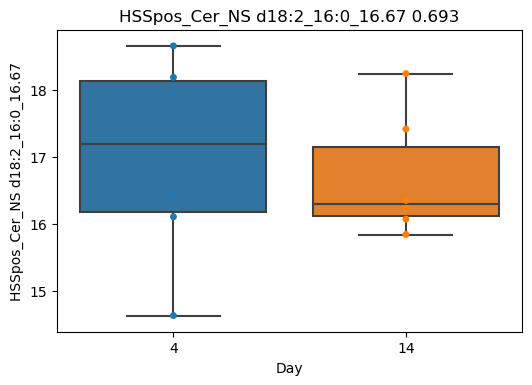

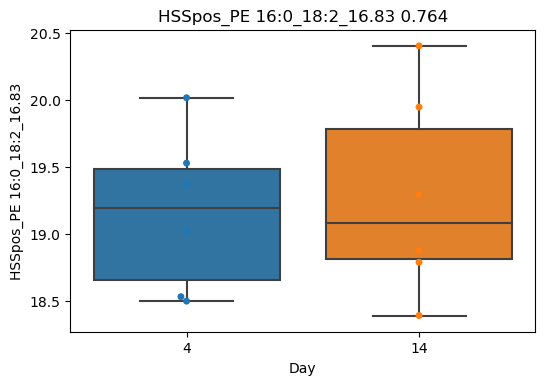

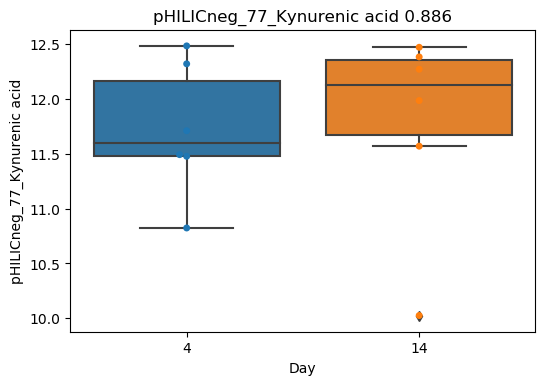

In [19]:
mol_names = data["Compound Name Leg"].values
samples = sample_info.index.values
area_cols = [x for x in data.columns.values if x in samples]
print(len(area_cols),len(samples))
data_matrix = np.log2(data[area_cols].transpose())

var_imp = pd.read_csv("../data/var_importance.csv",index_col=0)

vars_of_interest = []
var_names = []
special_case_mapper = {"pHILICpos_196_Kynurenic acid":"pHILICneg_77_Kynurenic acid"}
for x in var_imp.index.values:
    index = 0
    found = False
    if x in special_case_mapper:
        x = special_case_mapper[x]
    for y in mol_names:
        if "@" in y:
            y = y.split("@")[0]
        if y in x:
            vars_of_interest.append(index)
            var_names.append(x)
            found = True
            break
        index += 1
    if not found:
        index = 0
        for y in mol_names:
            if "@" in y:
                y = y.split("@")[0]
            y = y.replace(y.split("_")[0]+"_","")
            if y in x:
                vars_of_interest.append(index)
                var_names.append(x)
                found = True
                break
            index += 1
    if not found:
        print(x)
        
data_matrix = data_matrix.iloc[:,vars_of_interest]
print(data_matrix.shape)
data_matrix.columns = np.array(var_names)

samplesOfInterest = [x for x in data_matrix.index.values if sample_info.at[x,"Group"] in ["Mock"] and sample_info.at[x,"Day post infection"] in [4,14]]
print(len(samplesOfInterest))
data_matrix = data_matrix.loc[samplesOfInterest,:]

sample_kind_mapping = [sample_info.at[x,"Day post infection"] for x in data_matrix.index.values]

alpha = 0.05
sig_mets = []
pvals = []
for x in range(len(var_names)):
    sub = data_matrix[var_names[x]]

    plot_df = {}
    ind = 0
    for val,kind in zip(sub,sample_kind_mapping):
        plot_df[ind] = {var_names[x]:val,"Day":kind}
        ind += 1

    plot_df = pd.DataFrame.from_dict(plot_df,orient="index")
    
    stat,pval = stats.ttest_ind(*[plot_df[plot_df["Day"] == d][var_names[x]].values for d in [4,14]],equal_var=False)
    pvals.append(pval)
    if pval < alpha/len(mol_names):
        sig_mets.append(x)
        
    plt.figure()
    sb.boxplot(data=plot_df,x="Day",y=var_names[x])
    sb.swarmplot(data=plot_df,x="Day",y=var_names[x])
    plt.title(var_names[x] + " " + str(np.round(pval,3)))

print(len(sig_mets))
reject,pvals_corr,_,_ = multipletests(pvals,alpha,method="fdr_bh")
for name,p in zip(var_names,pvals_corr):
    if p < alpha:
        print(name,p)